In [1]:
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    AncillaRegister,
    IBMQ,
    Aer,
    __qiskit_version__,
)
from qiskit.circuit.library import QFT, GraphState, GroverOperator
from qiskit.qasm import pi
import numpy as np

from mqt.bench.utils.utils import *
from qiskit_nature.drivers import Molecule

from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.circuit.library import RealAmplitudes, TwoLocal
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.compiler import transpile

In [2]:
qp = get_examplary_max_cut_qp(3)
sim = QuantumInstance(
    backend=Aer.get_backend("qasm_simulator"), shots=1024, seed_simulator=123
)

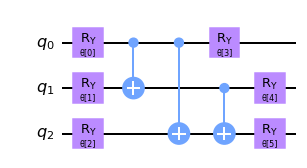

In [3]:
ansatz = TwoLocal(3, "ry", "cx", "full", reps=1)
# ansatz = RealAmplitudes(3, reps=2)
ansatz.decompose().draw(output="mpl", filename="flow_0")

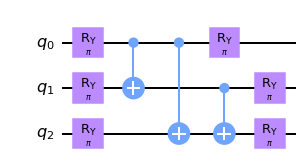

In [4]:
qc = ansatz.assign_parameters([np.pi, np.pi, np.pi, np.pi, np.pi, np.pi])
qc.decompose().draw(output="mpl", filename="flow_1")

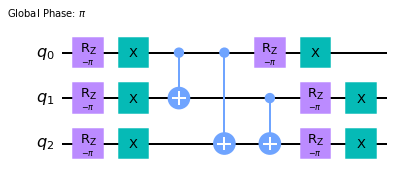

In [5]:
qc_2 = transpile(
    qc, basis_gates=["id", "rz", "sx", "x", "cx", "reset"], optimization_level=1
)
qc_2.draw(output="mpl", filename="flow_2")

In [7]:
from qiskit.test.mock import FakeManila

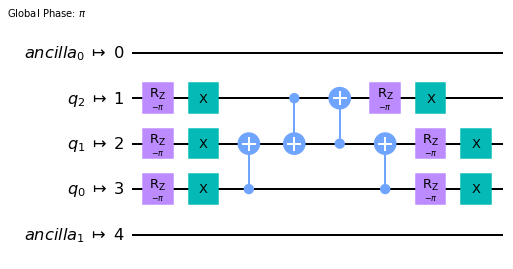

In [32]:
qc_3 = transpile(
    qc_2,
    basis_gates=["id", "rz", "sx", "x", "cx", "reset"],
    optimization_level=3,
    coupling_map=FakeManila().configuration().coupling_map,
)
qc_3.draw(output="mpl", filename="flow_2")